[View in Colaboratory](https://colab.research.google.com/github/vasiliyeskin/MachineLearningExperiences/blob/master/cifar10.ipynb)

# Распознавание объектов на изображениях из набора данных CIFAR-10

Пример из курса ["Программирование глубоких нейронных сетей на Python"](https://www.asozykin.ru/courses/nnpython).

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [0]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline 

In [0]:
# Размер мини-выборки
batch_size = 32
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений
img_rows, img_cols = 32, 32
# Количество каналов в изображении: RGB
img_channels = 3
# Названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

## Подготовка данных

**Загружаем данные**

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

**Просмотр примеров данных**

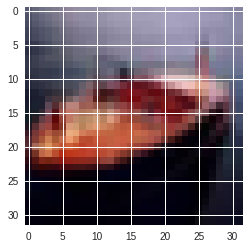

Номер класса: [8]
Тип объекта: корабль


In [17]:
n = 9545
plt.imshow(toimage(X_train[n]))
plt.show()
print("Номер класса:", y_train[n])
print("Тип объекта:", classes[y_train[n][0]])

**Нормализуем данные**

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Преобразуем правильные ответы в формат one hot encoding**

In [0]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Создаем нейронную сеть

In [0]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

**Печатаем информацию о сети**

In [7]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

**Компилируем модель**

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [22]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
 - 25s - loss: 1.5541 - acc: 0.4328 - val_loss: 1.1850 - val_acc: 0.5846
Epoch 2/25
 - 24s - loss: 1.1328 - acc: 0.5988 - val_loss: 0.9571 - val_acc: 0.6638
Epoch 3/25
 - 24s - loss: 0.9748 - acc: 0.6567 - val_loss: 0.8255 - val_acc: 0.7058
Epoch 4/25
 - 25s - loss: 0.8732 - acc: 0.6924 - val_loss: 0.7750 - val_acc: 0.7388
Epoch 5/25
 - 25s - loss: 0.8031 - acc: 0.7184 - val_loss: 0.7865 - val_acc: 0.7320
Epoch 6/25
 - 25s - loss: 0.7567 - acc: 0.7342 - val_loss: 0.6900 - val_acc: 0.7646
Epoch 7/25
 - 25s - loss: 0.7159 - acc: 0.7476 - val_loss: 0.6885 - val_acc: 0.7690
Epoch 8/25
 - 25s - loss: 0.6785 - acc: 0.7629 - val_loss: 0.6633 - val_acc: 0.7774
Epoch 9/25
 - 24s - loss: 0.6422 - acc: 0.7742 - val_loss: 0.6624 - val_acc: 0.7698
Epoch 10/25
 - 25s - loss: 0.6196 - acc: 0.7804 - val_loss: 0.6660 - val_acc: 0.7812
Epoch 11/25
 - 25s - loss: 0.5932 - acc: 0.7907 - val_loss: 0.6390 - val_acc: 0.7878
Epoch 12/25
 - 25s - loss

## Оцениваем качетсво обучения сети

In [23]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 77.18%


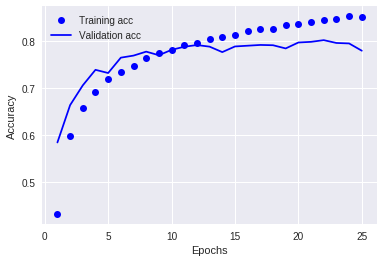

In [24]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Сохраняем обученную нейронную сеть

In [0]:
model_json = model.to_json()
json_file = open("cifar10_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("cifar10_model.h5")

In [26]:
!ls

cifar10_model.h5  cifar10_model.json  datalab  horse.png


In [0]:
from google.colab import files

In [0]:
files.download("cifar10_model.json")

In [0]:
files.download("cifar10_model.h5")

## Применяем сеть для распознавания объектов на изображениях

**Просмотр изображения из набора данных для тестирования**

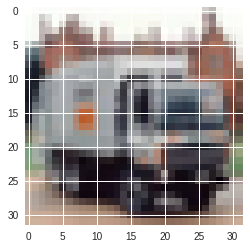

In [59]:
index=11
plt.imshow(toimage(X_test[index]))
plt.show()

**Преобразование тестового изображения**

In [0]:
x = X_test[index]
x = np.expand_dims(x, axis=0)

**Запуск распознавания**

In [0]:
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [62]:
print(prediction)

[[8.1685665e-12 3.7978654e-07 2.3843751e-17 1.1129013e-17 2.6797560e-21
  1.3213343e-19 3.1908867e-19 1.5573232e-18 1.0378241e-11 9.9999964e-01]]


**Преобразуем результаты из формата one hot encoding**

In [63]:
prediction = np.argmax(prediction)
print(classes[prediction])

грузовик


**Печатаем правильный ответ**

In [64]:
print(classes[y_test[index][0]])

грузовик


## Распознаем дополнительное изображение

In [65]:
from google.colab import files

files.upload()

Saving plane.jpg to plane.jpg


{'plane.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00d\x00d\x00\x00\xff\xec\x00\x85Ducky\x00\x01\x00\x04\x00\x00\x00<\x00\x03\x00p\x00\x00\x006\x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00\x00\xff\xee\x00\x0eAdobe\x00d\xc0\x00\x00\x00\x01\xff\xdb\x00\x84\x00\x06\x04\x04\x04\x05\x04\x06\x05\x05\x06\t\x06\x05\x06\t\x0b\x08\x06\x06\x08\x0b\x0c\n\n\x0b\n\n\x0c\x10\x0c\x0c\x0c\x0c\x0c\x0c\x10\x0c\x0e\x0f\x10\x0f\x0e\x0c\x13\x13\x14\x14\x13\x13\x1c\x1b\x1b\x1b\x1c\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x01\x07\x07\x07\r\x0c\r\x18\x10\x10\x18\x1a\x15\x11\x15\x1a\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x

Проверяем загрузку файлов

In [66]:
!ls

cifar10_model.h5  cifar10_model.json  datalab  horse.png  plane.jpg


**Смотрим загруженную картинку**

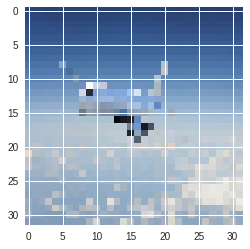

In [67]:
img_path = 'plane.jpg'
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

**Преобразуем картинку в массив для распознавания**

In [0]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [69]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])

самолет
